# <b>Modeling Water Consumption by the Urban Poor Using Machine Learning and Geospatial Information System </b>

### Andrew Olaitan Tolu Taiwo
### e-mail: tolutaiwo75@gmail.com
### Telephone: +234 (0)806 8799 836

### Submitted to the Department of Surveying and Geoinformatics, University of Lagos, in partial fulfilment of the award of Doctor of Philosophy

### ABSTRACT

### The problem of access to safe water among the urban poor in low-income countries persists partly because there are no empirical data about the volume of water consumed by poor people. Yet there can be no viable investment in water supply where volume of water consumed is not known.  This research aims to develop intelligent models that integrate machine learning and Geospatial Information System (GIS) to predict volume of water consumed by the urban poor. Integrating geospatial data, weather and social-economic data, the modelling was applied to a case study in Nyanya-Mararaba town, an informal dwelling place of the urban poor in Nigeria’s Federal Capital Territory (FCT). The study is divided into two parts: One, the study examines the influence of geospatial variables on the performance of Multilinear Regression (MLR). Two, the study investigates the influence of geospatial variables and various optimizers on Multilayer Perceptron (MLP) for predictive modelling. Three feature selection techniques and Principal Component Analysis were employed to get five best explanatory variables from the features. Three error metrics, Mean Absolute Error (MAE), Root Mean Squared Error (RMSE) and R squared (R2) score were used to measure the model performance.  In this first part, R2 score gives an average of 95% predictive accuracy. The results show that Principal Component Analysis performs better than features selection techniques. Addition of geospatial variable during training improved model performance considerably as observed-predicted difference decrease from 227 liters to 169 liters with MAE, and from 300 liters to 246 liters with RMSE while R2 score rose from 93% to 95%.  

### Keywords: water consumption, water poverty, multilinear regression, multilayer perceptron, Artificial Neural Networks, Sustainable Development Goals

## Selected Features Input into SGD Regressor

Information Gain 
 Household income       0.688177
Household size         1.031653
Rainfall               0.005951
Average temperature    0.009302
Travel time            1.204772
Shortest distance      0.000000
Amount spent           1.845552
Willingness to pay     1.814694
dtype: float64 

Recursive Feature Elimination 
 Household income       1
Household size         3
Rainfall               4
Average temperature    1
Travel time            1
Shortest distance      2
Amount spent           1
Willingness to pay     1
dtype: int32 

TRAINING DATA
Mean absolute error =  166.81122538685196
Root mean square error =  244.28894821097387
Rsquare score =  95.0 % 

VALIDATION DATA
Mean absolute error =  168.9995782249702
Root mean square error =  230.8650360373733
Rsquare score =  96.0 % 

TESTING DATA
Mean absolute error =  164.85902579543648
Root mean square error =  251.38771002206013
Rsquare score =  95.0 % 

COMPLETE DATA
Mean absolute error =  166.8584560361917
Root mean square error =  

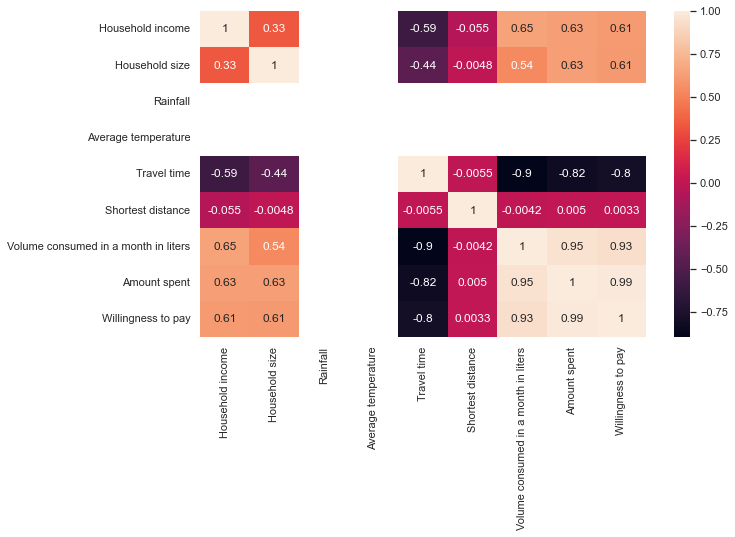

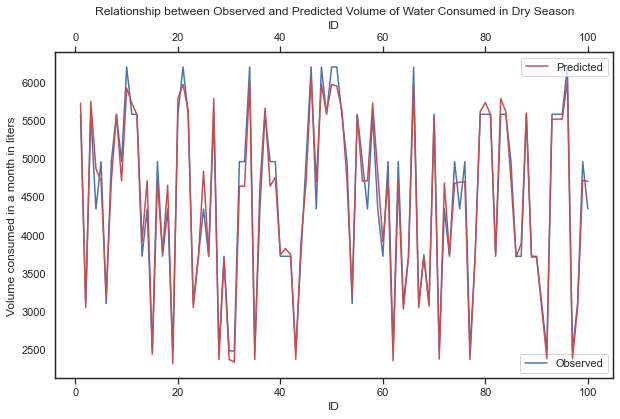

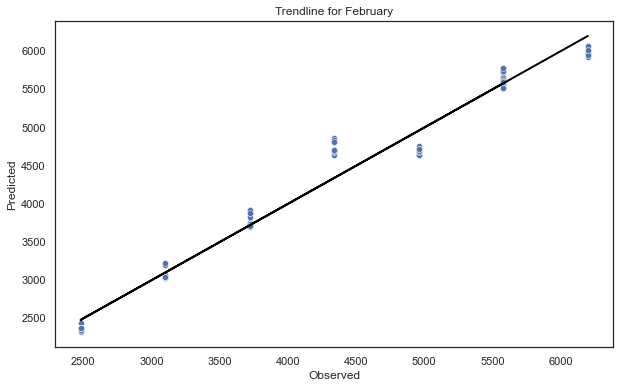

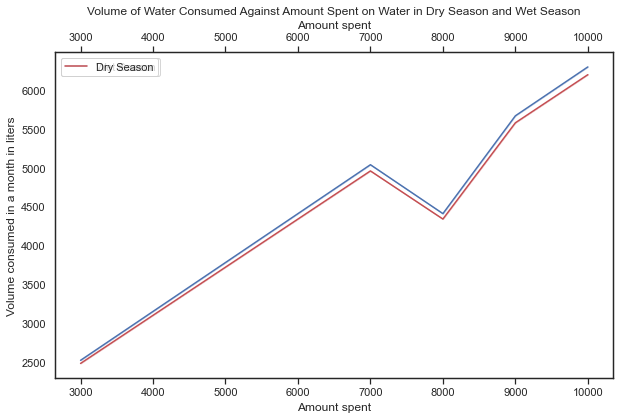

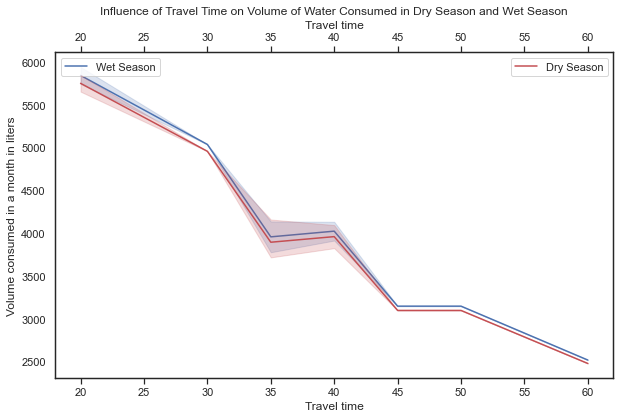

In [66]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Loading the data
data = pd.read_csv('dry_season_data.csv')

#Separate target variable from input variables
datafull = data.drop(columns=['ID', 
                              'Volume consumed in lpcd'], axis=1)
Xfull = datafull.drop(columns='Volume consumed in a month in liters', axis=1)
yfull= data['Volume consumed in a month in liters']

# Developing the model with Pipeline that infuses StandardScaler with SDGRegressor
model = Pipeline([('scaler', StandardScaler()), ('sgd', SGDRegressor(max_iter=10000, tol=1e-3))])

# FEATURE SELECTION
import pandas as pd
import numpy as np

# Pearson Correlation
def pearson_correlation(data):
    import matplotlib.pyplot as plt
    import seaborn as sns
    corr = data.corr()
    #Plotting heatmap
    plt.figure(figsize = (10,6))
    return sns.heatmap(corr, annot=True)
    
# Information Gain
def information_gain(x, y):
    from sklearn.feature_selection import mutual_info_classif
    from sklearn.feature_selection import SelectKBest
    # Determine the mutual information
    mutual_info = mutual_info_classif(x, y)
    # Select best five
    five_best = SelectKBest(mutual_info_classif, k=5)
    five_best.fit(x, y)
    index = x.columns[five_best.get_support()]
    score = five_best.scores_
    scores = pd.Series(score)
    scores.index = x.columns
    print("Information Gain", "\n", scores, "\n") 
    
# Recursive Feature Elimination
def recursive_feature_elimination(x, y):
    from sklearn. feature_selection import RFE
    from sklearn.linear_model import SGDRegressor
    model = SGDRegressor(max_iter=1000, tol=1e-3)
    rfe = RFE(model, n_features_to_select=5)
    fit = rfe.fit(x, y)
    # Representing in list form
    feature_ranking = pd.Series(fit.ranking_)
    feature_selected = pd.Series(fit.support_)
    feature_ranking.index = x.columns
    print("Recursive Feature Elimination", "\n", feature_ranking, "\n")

# Modeling with Selected Features
data_var = data.drop(columns=['ID', 
                              'Volume consumed in lpcd',
                              'Rainfall',
                              'Average temperature',
                              'Shortest distance'], axis=1)
X = data_var.drop(columns='Volume consumed in a month in liters', axis=1)
y = data['Volume consumed in a month in liters']

# Splitting data_var into training-validation-test set in ratio 80-10-10
# We first split the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6)

# Now we divide the remaining data equally between valid and test
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)     
    
# Training MLR model
model.fit(X_train, y_train)
def training(x1, y1):
    print('TRAINING DATA')
    X_train_prediction = model.predict(x1)
    #Evaluating the trained model
    evaluation(y_train, X_train_prediction)
    
#Validating the model
def validation(x1, y1):
    print('VALIDATION DATA')
    X_valid_prediction = model.predict(x1)
    #Evaluating the validated model
    evaluation(y1, X_valid_prediction)

#Testing the model
def testing(x1, y1):
    print('TESTING DATA')
    X_test_prediction = model.predict(x1)
    #Evaluating the tested model
    evaluation(y1, X_test_prediction)

# Predicting volume with the complete data
def complete_prediction(x1, y1):
    print('COMPLETE DATA')
    X_complete_prediction = model.predict(x1)
    evaluation(y, X_complete_prediction)
    #Convert to dataframe
    pred = pd.DataFrame(X_complete_prediction, columns=['Predicted volume'])
    # Join original data table and pred
    complete_data = pd.DataFrame(pd.concat([data, pred], axis=1))
    #Get first 100 records
    data100 = complete_data.iloc[:100]
    #print into excel csv file
    Complete_Data_With_Prediction = complete_data.to_csv('poor_people_water_data_predicted_dryseason.csv')
    
    # Plotting the relationship bwtween observed and predicted volume
    import matplotlib.pyplot as plt
    import seaborn as sns
    fig, ax = plt.subplots()
    sns.lineplot(x='ID', y='Volume consumed in a month in liters', data=data100, ax=ax, label="Observed")
    ax2 = ax.twiny()
    sns.lineplot(x='ID', y='Predicted volume', data=data100, ax=ax2, color='r', label="Predicted")
    sns.set_style("white")
    plt.title('Relationship between Observed and Predicted Volume of Water Consumed in Dry Season')
    ax.legend(loc = 'lower right')
    plt.show()
    
    # Plotting trendline
    sns.scatterplot(data=data100, x='Volume consumed in a month in liters', y='Predicted volume')
    sns.set(rc={'figure.figsize':(10, 6)})
    plt.plot(y, y, color='black', linewidth=2, label='prediction')
    sns.set_style("white")
    plt.title('Trendline for February')
    plt.xlabel('Observed')
    plt.ylabel('Predicted')
    plt.show()
    
    # Plotting relationship between water consumed and amount spent in dry and wet seasons
    data1 = pd.read_csv('dry_season_data.csv')
    data2 = pd.read_csv('wet_season_data.csv')
    #Get first 100 records
    data1 = data1.iloc[:100]
    data2 = data2.iloc[:100]
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    sns.lineplot(x= 'Amount spent', y = 'Volume consumed in a month in liters', data=data2, ax=ax, label="Wet Season")
    ax2 = ax.twiny()
    sns.lineplot(x= 'Amount spent', y = 'Volume consumed in a month in liters', data=data1, ax=ax2, color='r', label="Dry Season")
    sns.set_style("white")
    plt.title('Volume of Water Consumed Against Amount Spent on Water in Dry Season and Wet Season')
    ax.legend(loc = 'upper left')
    plt.show()
    
    # Plotting relationship between water consumed and tavel time in dry and wet seasons
    fig, ax = plt.subplots()
    sns.lineplot(x= 'Travel time', y = 'Volume consumed in a month in liters', data=data2, ax=ax, label="Wet Season")
    ax2 = ax.twiny()
    sns.lineplot(x= 'Travel time', y = 'Volume consumed in a month in liters', data=data1, ax=ax2, color='r', label="Dry Season")
    sns.set_style("white")
    plt.title('Influence of Travel Time on Volume of Water Consumed in Dry Season and Wet Season')
    ax.legend(loc = 'upper left')
    plt.show()
    
# Model evaluation with Mean Absolute Error, Root Mean Square Error and Rsquare Score
def evaluation(x, y):
    mae = np.abs(np.subtract(x, np.asarray(y))).mean()
    print('Mean absolute error = ', mae)
    rmse = math.sqrt(np.square(np.subtract(x, y)).mean())
    print('Root mean square error = ', rmse)
    n = (np.subtract(x, x.mean())*np.subtract(y, y.mean())).sum()
    d = math.sqrt(np.square(np.subtract(x, x.mean())).sum()*np.square(np.subtract(y, y.mean())).sum())
    r2s = np.ceil(np.square(n/d)*100)
    print('Rsquare score = ', r2s,'%', "\n")
    
   
    
# Testing the feature selection code
pearson_correlation(datafull)
information_gain(Xfull, yfull)
recursive_feature_elimination(Xfull, yfull)

# Testing the MLR code
training(X_train, y_train)
validation(X_valid, y_valid)
testing(X_test, y_test)
complete_prediction(X, y)

## PCA Components Input into SDG Regressor

Explained Variance  [3.64496622 1.41149834 1.03981194 0.96291941 0.50335606] 

Explained Variance Ratio  [0.45524109 0.17629026 0.12986818 0.12026462 0.06286707] 



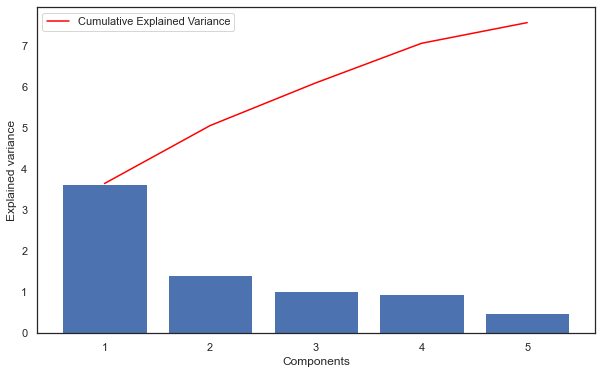

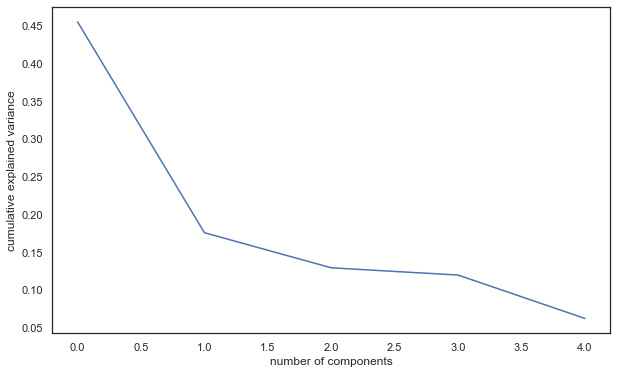

TRAINING DATA
Mean absolute error =  167.43907488059088
Root mean square error =  226.20960714232467
Rsquare score = 96.0 

VALIDATION DATA
Mean absolute error =  184.38729316073986
Root mean square error =  250.1467227756703
Rsquare score = 96.0 

TESTING DATA
Mean absolute error =  148.1720210775231
Root mean square error =  186.10247539715476
Rsquare score = 98.0 

COMPLETE DATA
Mean absolute error =  166.97530777600724
Root mean square error =  223.92850348037936
Rsquare score = 96.0 



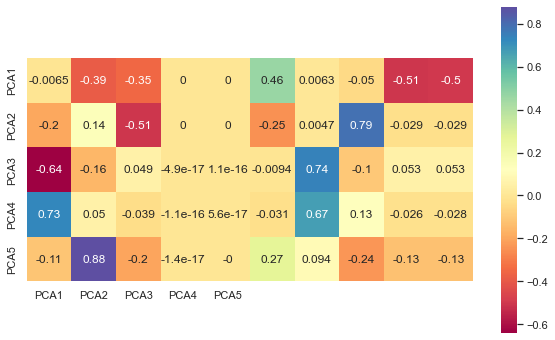

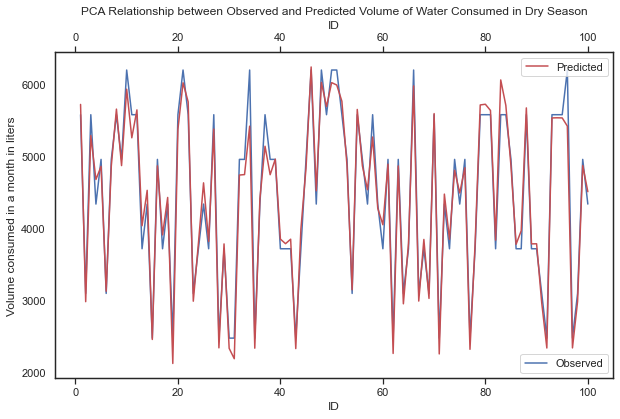

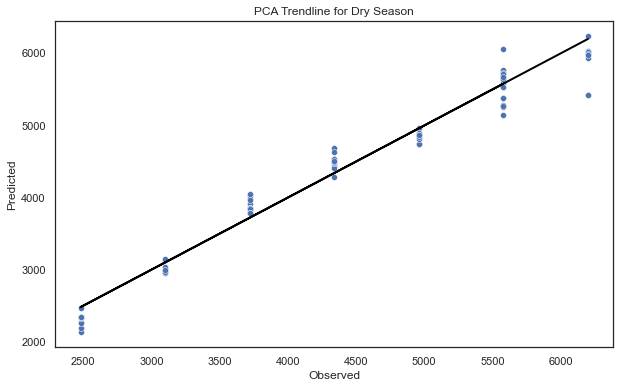

In [68]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Principal Component Analysis
def pca(n_components, data):
    # Standardize the data
    from sklearn.preprocessing import StandardScaler
    Xscaled = StandardScaler().fit_transform(data)
    Xscaled = pd.DataFrame(Xscaled, columns=['ID', 
                            'Household income', 
                            'Household size', 
                            'Rainfall',
                            'Average temperature',
                            'Shortest distance', 
                            'Travel time', 
                            'Volume consumed in lpcd', 
                            'Amount spent', 
                            'Willingness to pay'])
    # Getting PCA components
    from sklearn.decomposition import PCA
    pcamodel = PCA(n_components)
    pca = pcamodel.fit_transform(Xscaled)
    global X # Making pca global so it can used elsewhere
    X = pd.DataFrame(pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'])
    print('Explained Variance ', pcamodel.explained_variance_, "\n")
    print('Explained Variance Ratio ', pcamodel.explained_variance_ratio_, "\n")
    
    #Explained variance plot
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
    plt.ylabel('Explained variance')
    plt.xlabel('Components')
    plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
    plt.legend(loc='upper left')
    plt.show()
       
    #Explained Variance ratio plot
    plt.plot(pcamodel.explained_variance_ratio_)
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()
    
    # Heatmap showing effect of variables on each component
    ax = sns.heatmap(pcamodel.components_,
                 cmap='Spectral',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pcamodel.n_components_+1)],
                 xticklabels=list(X.columns),
                 cbar_kws={"orientation": "vertical"}, annot=True)
    ax.set_aspect("equal")


#Testing the PCA code
# Loading the data
data = pd.read_csv('dry_season_data.csv')
#Separate target variable from input variables
Xfull = data.drop(columns='Volume consumed in a month in liters', axis=1)
pca(5, Xfull)    
    
# Modeling with the Five Extracted Features
# Loading the data
data = pd.read_csv('dry_season_data.csv')
#Separate target variable from input variables
X    # X is the global variable from function pca; it is dataframe of the five extracted PCAs
y = data['Volume consumed in a month in liters']

# Splitting data_var into training-validation-test set in ratio 80-10-10
# We first split the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6)

# Now we divide the remaining data equally between valid and test
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

# Developing the model with Pipeline that infuses StandardScaler with SDGRegressor
model = Pipeline([('scaler', StandardScaler()), ('sgd', SGDRegressor(max_iter=10000, tol=1e-3))])

# Training MLR model
model.fit(X_train, y_train)
def training(x1, y1):
    print('TRAINING DATA')
    X_train_prediction = model.predict(x1)
    #Evaluating the trained model
    evaluation(y_train, X_train_prediction)
    
#Validating the model
def validation(x1, y1):
    print('VALIDATION DATA')
    X_valid_prediction = model.predict(x1)
    #Evaluating the validated model
    evaluation(y1, X_valid_prediction)

#Testing the model
def testing(x1, y1):
    print('TESTING DATA')
    X_test_prediction = model.predict(x1)
    #Evaluating the tested model
    evaluation(y1, X_test_prediction)
    

# Predicting volume with the complete data
def complete_prediction(x1, y1):
    print('COMPLETE DATA')
    X_complete_prediction = model.predict(x1)
    evaluation(y, X_complete_prediction)
    #Convert to dataframe
    pred = pd.DataFrame(X_complete_prediction, columns=['Predicted volume'])
    # Join original data table and pred
    complete_data = pd.DataFrame(pd.concat([data, pred], axis=1))
    #Get first 100 records
    data100 = complete_data.iloc[:100]
    #print into excel csv file
    #Complete_Data_With_Prediction = complete_data.to_csv('poor_people_water_data_predicted_february.csv')
    
    # Plotting the relationship bwtween observed and predicted volume
    import matplotlib.pyplot as plt
    import seaborn as sns
    fig, ax = plt.subplots()
    sns.lineplot(x='ID', y='Volume consumed in a month in liters', data=data100, ax=ax, label="Observed")
    ax2 = ax.twiny()
    sns.lineplot(x='ID', y='Predicted volume', data=data100, ax=ax2, color='r', label="Predicted")
    sns.set_style("white")
    plt.title('PCA Relationship between Observed and Predicted Volume of Water Consumed in Dry Season')
    ax.legend(loc = 'lower right')
    plt.show()
    
    # Plotting trendline
    sns.scatterplot(data=data100, x='Volume consumed in a month in liters', y='Predicted volume')
    sns.set(rc={'figure.figsize':(10, 6)})
    plt.plot(y, y, color='black', linewidth=2, label='prediction')
    sns.set_style("white")
    plt.title('PCA Trendline for Dry Season')
    plt.xlabel('Observed')
    plt.ylabel('Predicted')
    plt.show()
    
# Model evaluation with Mean Absolute Error, Root Mean Square Error and Rsquare Score
def evaluation(x, y):
    mae = np.abs(np.subtract(x, np.asarray(y))).mean()
    print('Mean absolute error = ', mae)
    rmse = math.sqrt(np.square(np.subtract(x, y)).mean())
    print('Root mean square error = ', rmse)
    n = (np.subtract(x, x.mean())*np.subtract(y, y.mean())).sum()
    d = math.sqrt(np.square(np.subtract(x, x.mean())).sum()*np.square(np.subtract(y, y.mean())).sum())
    r2s = np.ceil(np.square(n/d)*100.0)
    print('Rsquare score =', r2s, "\n")
    

#Testing the MLR code
training(X_train, y_train)
validation(X_valid, y_valid)
testing(X_test, y_test)
complete_prediction(X, y)